# Pymaceuticals Inc.
---

### Analysis

- When looking at the average weight of a mouse versus the average tumor of the mouse (scatter plot all the way at the end), we see that the more the mouse weighs the less effective the drug, Capomulin, is. This observation can be drawn because of the strong r-value of 0.84.

- If we refer to the bar chart showing the total number of mice tested per drug regimen, it can be seen that more mice were tested with the drug Capomulin and that the drug Ramicane not far behind it in the amount of mice. This portrays that this study focused more on those specific drugs. 

- Looking at the summary statistic table, tumors that were treated using Ramicane and Capomulin had lower final tumor volumes then the other drugs. Showing that these drugs seem to be more effective in treating the tumors. However Ramicane had slightly lower numbers, but in order to make the statement that Ramicane works better on tumors, there would need to be the same number of mice treated by both drugs. (in this study Ramican has been tested on slightly less mice then Capomulin)
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
study_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
study_complete_df["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = study_complete_df.loc[study_complete_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = study_complete_df.loc[study_complete_df["Mouse ID"] == "g989" , :]
duplicate_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_cleaned_df = study_complete_df[study_complete_df["Mouse ID"].isin(duplicate_mouse_id)== False]
study_cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
study_cleaned_df["Mouse ID"].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

study_tumor_df = study_cleaned_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = study_tumor_df["Tumor Volume (mm3)"].mean()
tumor_median= study_tumor_df["Tumor Volume (mm3)"].median()
tumor_variance= study_tumor_df["Tumor Volume (mm3)"].var()
tumor_stdev= study_tumor_df["Tumor Volume (mm3)"].std()
tumor_sem= study_tumor_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_tumor_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_stdev,
    "Tumor Volume Std. Err.": tumor_sem
})

summary_tumor_df.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_study_aggregated = study_cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_study_aggregated

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Mice Tested per Drug Regimen')

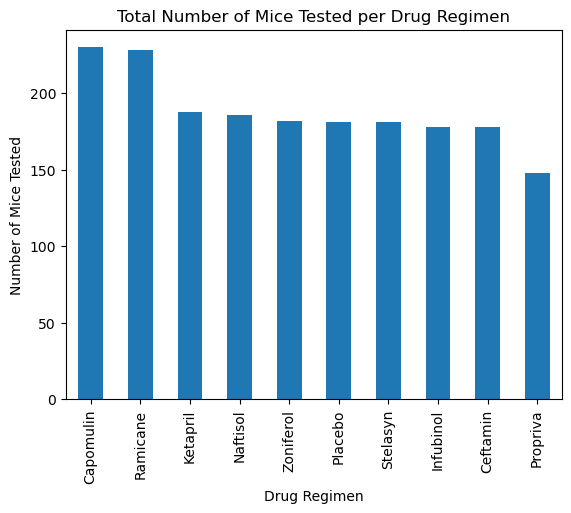

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
study_mice_counts = study_cleaned_df["Drug Regimen"].value_counts()
study_bar_plot= study_mice_counts.plot(kind= "bar")
study_bar_plot.set_xlabel("Drug Regimen")
study_bar_plot.set_ylabel("Number of Mice Tested")
study_bar_plot.set_title("Total Number of Mice Tested per Drug Regimen")


<function matplotlib.pyplot.show(close=None, block=None)>

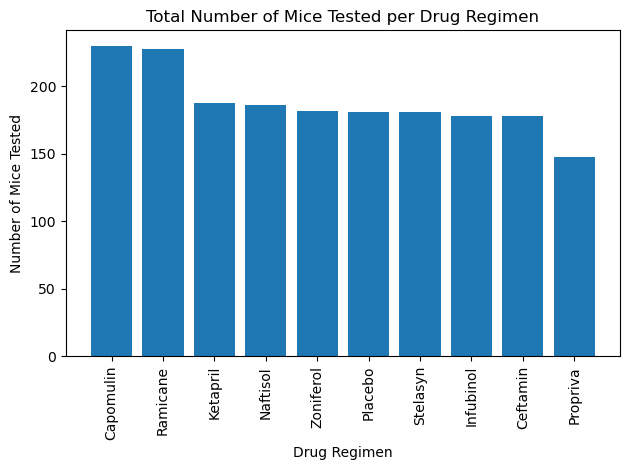

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(study_mice_counts))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, study_mice_counts)
plt.xticks(tick_locations, study_mice_counts.index.values, rotation="vertical")
plt.title("Total Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show


Text(0, 0.5, ' ')

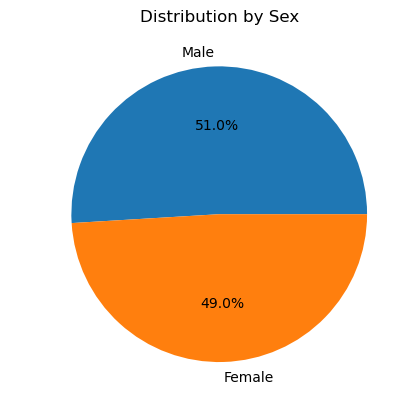

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice_counts = study_cleaned_df["Sex"].value_counts()
gender_pie_plot= gender_mice_counts.plot(kind= "pie", autopct="%1.1f%%")
gender_pie_plot.set_title("Distribution by Sex")
gender_pie_plot.set_ylabel(" ")

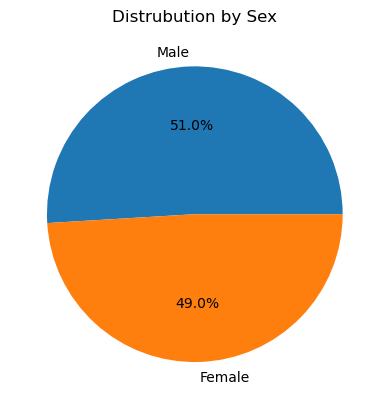

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_sizes = gender_mice_counts
labels = gender_sizes.index.values
plt.pie(gender_sizes, labels=labels, autopct="%1.1f%%")
plt.title("Distrubution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = study_cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor_vol_df = pd.DataFrame(final_tumor_vol)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(study_cleaned_df, final_tumor_vol_df, how="right", on=["Mouse ID", "Timepoint"])
final_tumor_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = final_tumor_df.loc[final_tumor_df["Drug Regimen"]== drug,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_data.append(final_tumor)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outlier_df = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print(f"{drug}'s potential outliers: Values below {round(lower_bound,2)}")
    print(f"{drug}'s potential outliers: Values above {round(lower_bound,2)}")

    print(f'Number of {drug} outliers: {outlier_df}')


Capomulin's potential outliers: Values below 20.7
Capomulin's potential outliers: Values above 20.7
Number of Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Values below 17.91
Ramicane's potential outliers: Values above 17.91
Number of Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Values below 36.83
Infubinol's potential outliers: Values above 36.83
Number of Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Values below 25.36
Ceftamin's potential outliers: Values above 25.36
Number of Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


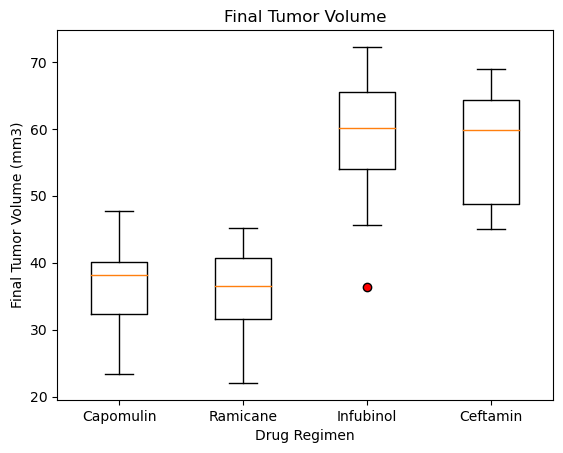

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(tumor_data, flierprops={'markerfacecolor':'r'})
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_title("Final Tumor Volume")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

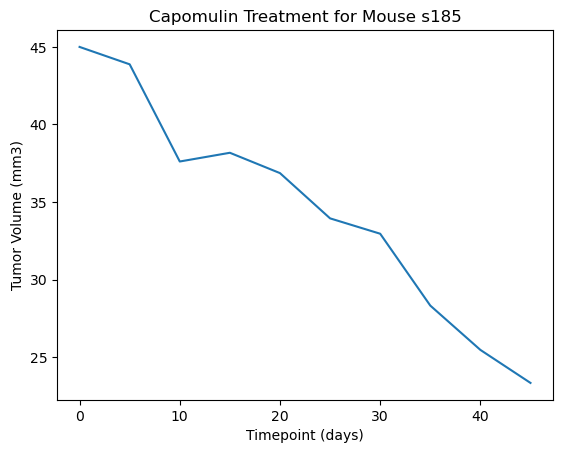

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = study_cleaned_df.loc[study_cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_data
mouse_id = "s185"
capomulin_mouse_df = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id] 
tumor_vol = plt.plot(capomulin_mouse_df['Timepoint'], capomulin_mouse_df['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


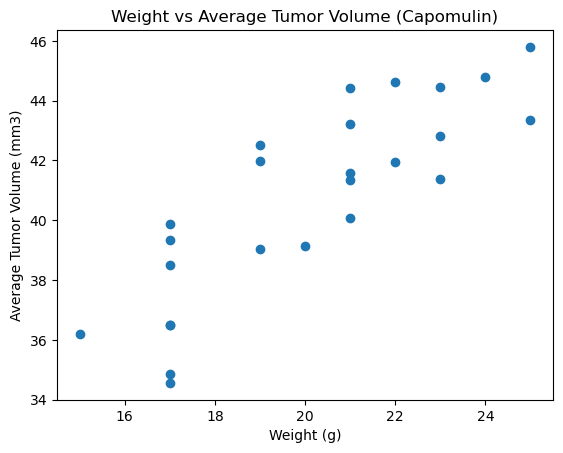

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = capomulin_data.groupby("Mouse ID").mean()
mouse_weight = capomulin_df["Weight (g)"]
avg_tumor_vol = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, avg_tumor_vol)
plt.title("Weight vs Average Tumor Volume (Capomulin)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84


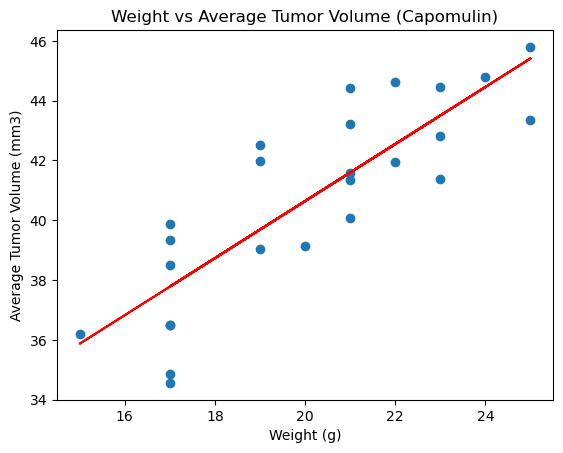

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight
y_values= avg_tumor_vol
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="r")
plt.title ("Weight vs Average Tumor Volume (Capomulin)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()